In [1]:
# Importing models
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('/content/Train Dataset_Annie assignment .csv')

In [3]:
df

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1


In [4]:
# Display first few rows
df.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [5]:
# Display the last few rows
df.tail()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
7298,19401,30,1,2,107,177,1,2,119,0,2.7,1,0,0,0
7299,10446,42,1,2,96,551,1,2,76,0,1.9,2,3,2,1
7300,13219,51,1,0,151,165,1,0,190,1,0.9,0,0,2,1
7301,15349,29,0,0,195,287,1,2,161,1,3.4,1,1,0,1
7302,15363,38,0,0,193,487,0,1,154,1,4.8,1,4,3,1


In [6]:
# Remove all ? and replace with null
df.replace('?', np.nan, inplace = True)

In [7]:
# Display the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [9]:
# Display the data shape
df.shape

(7303, 15)

In [10]:
# Display the data size
df.size

109545

In [11]:
# Checking for nulls
df.isnull().sum()

,0
Id,0
Age,0
Sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0


In [12]:
# Filing in the oldpeak with mean
df["oldpeak"] = pd.to_numeric(df["oldpeak"], errors="coerce")
df["oldpeak"].fillna(df["oldpeak"].mean(), inplace = True)

<ipython-input-12-d24f5f64ba48>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["oldpeak"].fillna(df["oldpeak"].mean(), inplace = True)


In [13]:
# Checking for duplicates
df.duplicated().sum()

0

**VISUALIZATING EXPLORATORY DATA ANALYSIS**

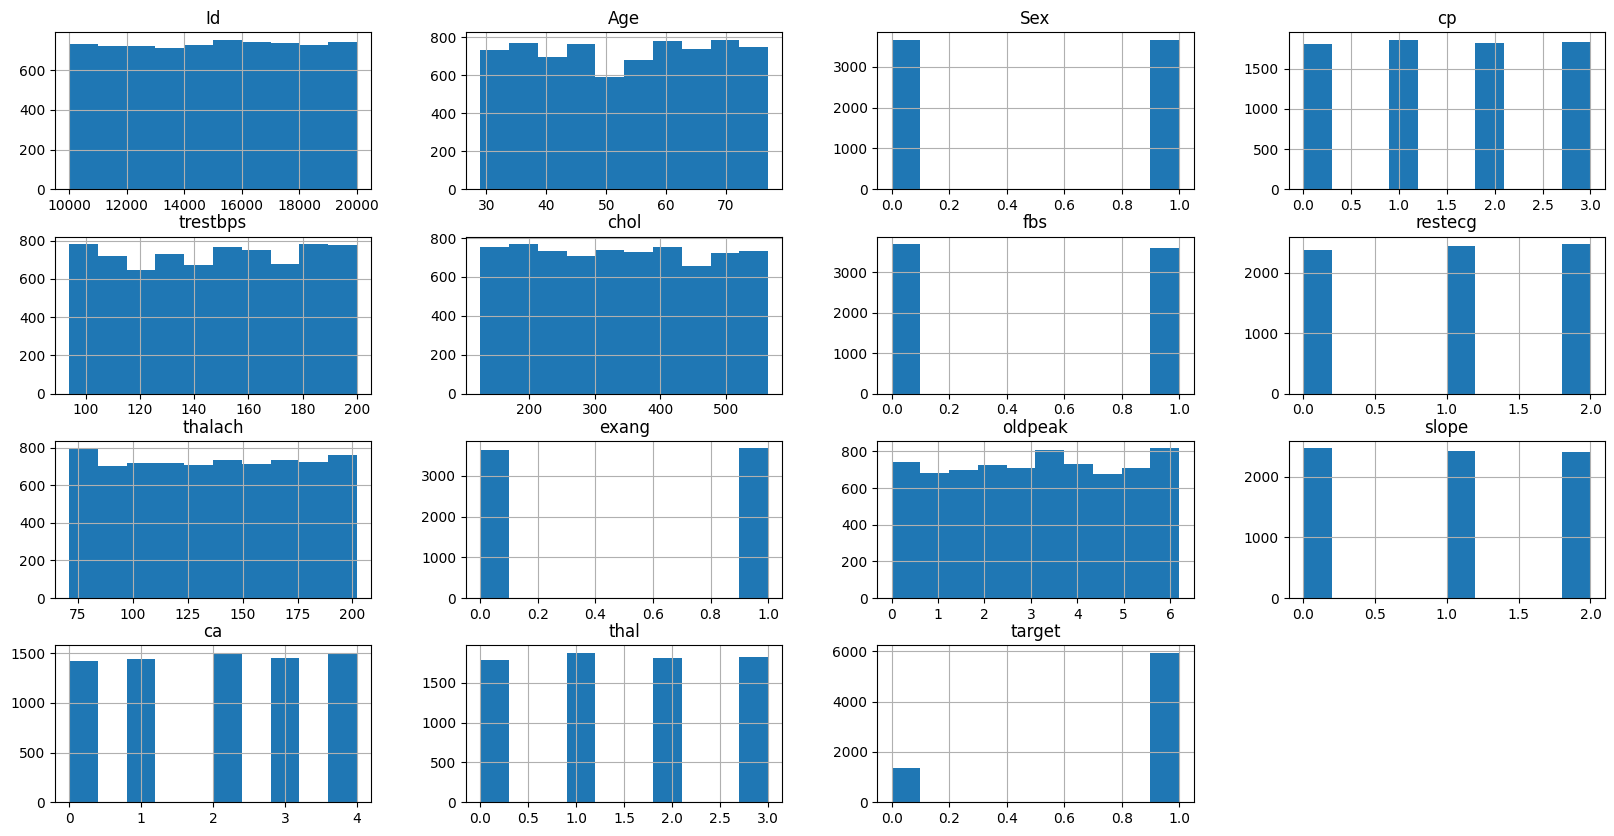

In [14]:
# Visualing the features and Target
df.hist(figsize=(20,10))
plt.show()

In [15]:
# Correlation Matrix
correlation_matrix = df.corr()
correlation_matrix

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
Id,1.000000,-0.007837,0.002818,-0.018952,-0.016580,0.015200,-0.023790,0.001488,-0.012959,0.001735,0.004434,0.000617,0.033008,-0.000420,0.006148
Age,-0.007837,1.000000,0.002335,-0.001771,-0.022767,0.004541,0.012960,-0.002644,0.000204,0.001495,0.007193,-0.004480,0.013257,0.002313,-0.002846
Sex,0.002818,0.002335,1.000000,-0.030134,0.002793,-0.007434,-0.017675,-0.003850,-0.006331,0.027802,-0.004897,0.000663,0.010203,0.003261,0.030608
cp,-0.018952,-0.001771,-0.030134,1.000000,0.011924,0.024823,-0.016848,0.001544,0.019503,0.009621,0.000942,-0.009439,0.013676,-0.009296,-0.198082
trestbps,-0.016580,-0.022767,0.002793,0.011924,1.000000,-0.003238,0.003757,0.010334,0.001575,0.021449,0.011277,0.001750,-0.009947,0.005632,0.009320
chol,0.015200,0.004541,-0.007434,0.024823,-0.003238,1.000000,0.006588,0.003218,-0.014182,-0.006674,-0.003930,-0.013061,0.007788,0.011114,-0.012291
fbs,-0.023790,0.012960,-0.017675,-0.016848,0.003757,0.006588,1.000000,-0.002298,0.005419,0.010908,0.004803,0.000191,0.001255,-0.006554,0.003925
restecg,0.001488,-0.002644,-0.003850,0.001544,0.010334,0.003218,-0.002298,1.000000,-0.004714,-0.000270,0.017644,0.015365,0.003593,-0.007497,0.005911
thalach,-0.012959,0.000204,-0.006331,0.019503,0.001575,-0.014182,0.005419,-0.004714,1.000000,0.019037,0.012347,-0.010617,0.004899,0.007943,-0.004634
exang,0.001735,0.001495,0.027802,0.009621,0.021449,-0.006674,0.010908,-0.000270,0.019037,1.000000,0.018074,0.005094,-0.012028,0.010875,0.481897


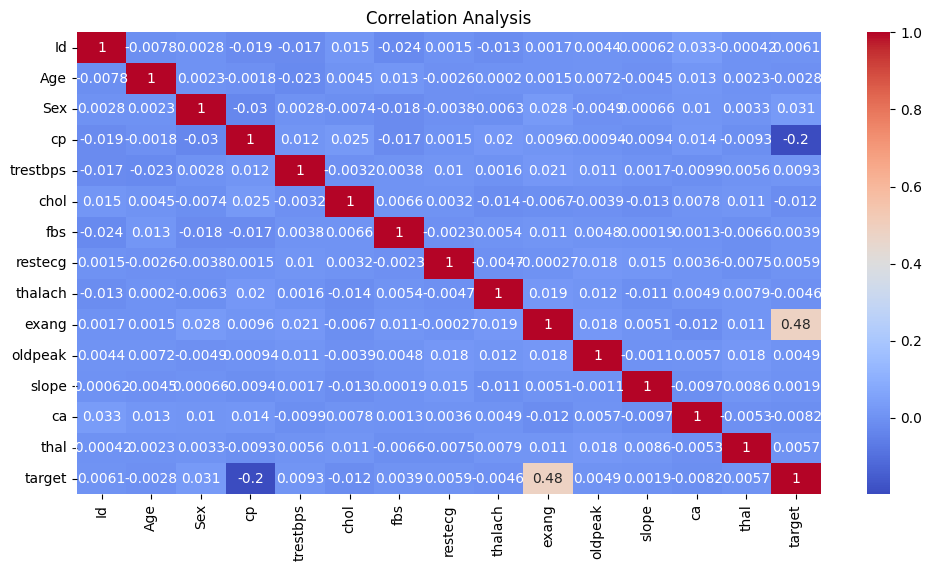

In [16]:
# Visualizing Correlation Analysis
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()

<ipython-input-20-30eef45b28af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


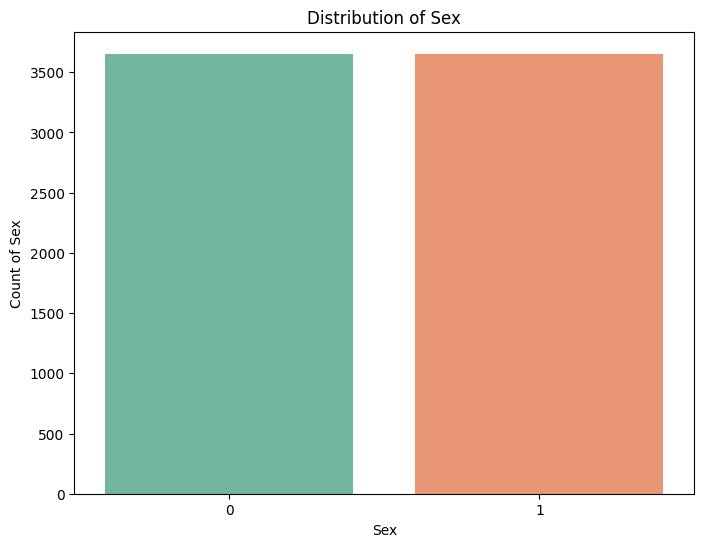

In [20]:
# Visualizing the Distribution of Sex
plt.figure(figsize=(8,6))
sns.countplot(x='Sex',data=df, palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count of Sex')
plt.show()

In [21]:
# Creating age categories
df['age_category'] = pd.cut(df['Age'], bins= [29, 39, 49, 59, 69, 79], labels= ['30-39', '40-49', '50-59', '60-69', '70-79'], right=False)

In [25]:
# Creating chol levels as categories
df['chol'] = pd.cut(df['chol'], bins=[0, 200, 240, 600], labels=['Normal', 'Borderline', 'High'])

In [26]:
# Standardizating the document
label_encoder = LabelEncoder()
df['chol'] = label_encoder.fit_transform(df['chol'])
df['Age'] = label_encoder.fit_transform(df['Age'])

In [27]:
# Determining X and y
X = df.drop('Sex', axis=1)
y = df['Sex']

In [28]:
# Calling Random forest model
model = RandomForestClassifier(random_state = 0)

In [29]:
# Calling Recursive Feature Elimination
rfe = RFE(model, n_features_to_select=5)

In [33]:
# Importing necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Instantiate the Logistic Regression model
model = LogisticRegression()

# Set up RFE with the Logistic Regression model
rfe = RFE(model, n_features_to_select=10)  # You can adjust the number of features

# Fitting RFE on the numeric dataset
fit = rfe.fit(X_encoded, y)

# Checking the results of feature selection
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features: [False False  True False  True  True False False  True False False  True
 False  True  True  True  True  True]
Feature Ranking: [9 5 1 8 1 1 2 7 1 3 6 1 4 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**MODEL SELECTION, TRAINING AND EVALUATION**

In [36]:
# Splitting Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Step 1: One-hot encode categorical variables in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Ensure the target y_train is numeric (if it's not already)
# Assuming y_train is categorical, you can convert it to numeric using label encoding or manual mapping
# If y_train is already numeric, you can skip this step.

# Import LabelEncoder for target variable if it's categorical
from sklearn.preprocessing import LabelEncoder

# Encoding y_train (if necessary)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 3: Fitting Logistic Regression with the cleaned and encoded data
model_lr = LogisticRegression()
model_lr.fit(X_train_encoded, y_train_encoded)

# Model is now successfully trained!

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
# Step 1: One-hot encode categorical variables in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Ensure y is numeric (apply LabelEncoder if necessary)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Cross-validation with Logistic Regression
from sklearn.model_selection import cross_val_score

# Perform cross-validation
lr_cross = cross_val_score(model_lr, X_encoded, y_encoded, cv=5)

# Display cross-validation scores
lr_cross

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.50855578, 0.50171116, 0.49212868, 0.50068493, 0.52123288])

In [41]:
# Step 1: Combine X_train and X_test to apply consistent one-hot encoding
X_combined = pd.concat([X_train, X_test], axis=0)

# Step 2: Apply one-hot encoding on the combined dataset
X_combined_encoded = pd.get_dummies(X_combined, drop_first=True)

# Step 3: Split the encoded combined dataset back into X_train_encoded and X_test_encoded
X_train_encoded = X_combined_encoded.iloc[:X_train.shape[0], :]
X_test_encoded = X_combined_encoded.iloc[X_train.shape[0]:, :]

# Step 4: Predict using the logistic regression model
pred_lr = model_lr.predict(X_test_encoded)

# Output the predictions
pred_lr

array([0, 1, 0, ..., 0, 1, 1])

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

In [43]:
print("Type of y_test:", type(y_test))
print("Shape of y_test:", y_test.shape)


Type of y_test: <class 'pandas.core.series.Series'>
Shape of y_test: (2191,)


In [44]:
# Model evaluation of logistic regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, pred_lr,average='macro'))
print("Logistic Regression Recall:", recall_score(y_test, pred_lr, average='macro'))
print("Logistic Regression F1 Score:", f1_score(y_test, pred_lr, average='macro'))

Logistic Regression Accuracy: 0.5025102692834322
Logistic Regression Precision: 0.5044411095296051
Logistic Regression Recall: 0.5043072188220544
Logistic Regression F1 Score: 0.4995326828614059


In [47]:
print(X_train.dtypes)


Id                 int64
Age                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
target             int64
age_category    category
dtype: object


In [48]:
# One-Hot Encoding for categorical variables in X_train
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Do the same for X_test
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test_encoded with X_train_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [49]:
# Fitting Random Forest after encoding
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train_encoded, y_train)  # Use X_train_encoded

RandomForestClassifier()

In [51]:
import pandas as pd

# Assuming your dataset is in a DataFrame called `df`
X = df.drop('Sex', axis=1)  # Replace with your actual feature columns
y = df['Sex']  # Replace with your target column

# One-Hot Encoding for categorical variables in the whole dataset
X_encoded = pd.get_dummies(X, drop_first=True)

# Now, `X_encoded` is your feature set, and it should only contain numerical values

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize your Random Forest model
model_rfc = RandomForestClassifier()

# Perform cross-validation
rfc_cross = cross_val_score(model_rfc, X_encoded, y, cv=5)
print(rfc_cross)


[0.50513347 0.52087611 0.50992471 0.50205479 0.52123288]


In [53]:
# Assuming you have already created X_encoded from the training data
# You need to encode X_test similarly

X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test_encoded with X_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

In [54]:
# Encode training data
X_encoded = pd.get_dummies(X, drop_first=True)

# Fit the Random Forest model
model_rfc = RandomForestClassifier()
model_rfc.fit(X_encoded, y)

# Encode test data in the same way
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test_encoded with X_encoded
X_test_encoded = X_test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Make predictions
pred_rfc = model_rfc.predict(X_test_encoded)


In [55]:
# Model evaluation of Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rfc))
print("Random Forest Precision:", precision_score(y_test, pred_rfc,average='macro'))
print("Random Forest Recall:", recall_score(y_test, pred_rfc, average='macro'))
print("Random Forest F1 Score:", f1_score(y_test, pred_rfc, average='macro'))

Random Forest Accuracy: 1.0
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


In [56]:
# Encoding training data
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Fit the Decision Tree model using the encoded training data
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_encoded, y_train)

DecisionTreeClassifier()

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Step 1: Ensure all categorical variables in X are encoded
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 2: Fit the model for cross-validation
model_dtc = DecisionTreeClassifier()

# Step 3: Perform cross-validation
dtc_cross = cross_val_score(model_dtc, X_encoded, y, cv=5)

# Step 4: Output the results
print("Cross-Validation Scores:", dtc_cross)
print("Mean CV Score:", dtc_cross.mean())

Cross-Validation Scores: [0.47843943 0.48870637 0.51540041 0.49315068 0.48013699]
Mean CV Score: 0.49116677449298196


In [58]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Assuming X_train and y_train are already defined and preprocessed

# Step 1: Initialize and fit the Decision Tree model
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train_encoded, y_train)  # Ensure you're using the encoded training set

# Step 2: Prepare the X_test data (as per previous instructions)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 3: Make predictions
pred_dtc = model_dtc.predict(X_test_encoded)

# Output the predictions
print("Predictions from Decision Tree:", pred_dtc)

Predictions from Decision Tree: [0 0 0 ... 1 0 1]


In [59]:
# Model evaluation of Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dtc))
print("Decision Tree Precision:", precision_score(y_test, pred_dtc,average='macro'))
print("Decision Tree Recall:", recall_score(y_test, pred_dtc, average='macro'))
print("Decision Tree F1 Score:", f1_score(y_test, pred_dtc, average='macro'))

Decision Tree Accuracy: 0.507074395253309
Decision Tree Precision: 0.5073173985176787
Decision Tree Recall: 0.507316520147314
Decision Tree F1 Score: 0.5070734711086743


In [60]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Now fit the model with increased max_iter
model_lr = LogisticRegression(max_iter=200)  # Increase the max_iter as needed
model_lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [62]:
# prompt: # Ensure y_test is a 1D array
# if isinstance(y_test, pd.DataFrame):
#     y_test = y_test.values.ravel()  # Convert DataFrame to 1D array
# elif isinstance(y_test, pd.Series):
#     y_test = y_test.values  # Convert Series to 1D array
# # Now evaluate the models
# model_lr_results = evaluate_model(y_test, pred_lr, "Logistic Regression", model_lr_pred_proba)
# model_dtc_results = evaluate_model(y_test, pred_dt

def evaluate_model(y_true, y_pred, model_name, y_pred_proba=None):
  """Evaluates a classification model and returns a dictionary of metrics."""
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  results = {
      'Model': model_name,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1,
  }

  if y_pred_proba is not None:
      auc = roc_auc_score(y_true, y_pred_proba[:, 1])  # Assuming binary classification
      results['AUC'] = auc

  return results

# Make predictions with the Logistic Regression model
model_lr_pred_proba = model_lr.predict_proba(X_test_encoded)
pred_lr = model_lr.predict(X_test_encoded)

# Make predictions with the Decision Tree model
pred_dtc = model_dtc.predict(X_test_encoded)

# Make predictions with the Random Forest model
pred_rfc = model_rfc.predict(X_test_encoded)

# Evaluate the models
model_lr_results = evaluate_model(y_test, pred_lr, "Logistic Regression", model_lr_pred_proba)
model_dtc_results = evaluate_model(y_test, pred_dtc, "Decision Tree")
model_rfc_results = evaluate_model(y_test, pred_rfc, "Random Forest")

# Print the results
print(model_lr_results)
print(model_dtc_results)
print(model_rfc_results)

{'Model': 'Logistic Regression', 'Accuracy': 0.4897307165677773, 'Precision': 0.24486535828388864, 'Recall': 0.5, 'F1-Score': 0.3287377450980392, 'AUC': 0.5}
{'Model': 'Decision Tree', 'Accuracy': 0.507074395253309, 'Precision': 0.5073173985176787, 'Recall': 0.507316520147314, 'F1-Score': 0.5070734711086743}
{'Model': 'Random Forest', 'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
